# Customer Churn Prediction using Machine Learning
Customer churn is when the customer stop consuming the business service.

## Steps for Bulding Performing Machine Learning Model from A-Z:
1. Data Preparation
2. Feature Engineering
3. Data Modeling
4. Performance Measure
5. Performance Improvement

## 1. Data Preparation
Preparing the data can be done in 3 steps:  
1.1. Data Query  
1.2. Data Cleaning  
1.3. Data Formating

### 1.1. Data Query
Our dataset is Telco Customer Churn: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
#importing nessecary liberaries
import pandas as pd
import numpy as np

In [2]:
# Load data from csv file:
original_data = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = original_data.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.2. Data Cleaning  
1.2.1. Missing Values  
1.2.2. Outliers

#### 1.2.1. Missing Values

In [3]:
#Calculate Rm for each column
def missing_values_rm(data):
  rm = []
  missing_values_column = []
  columns_names = data.columns
  for column in columns_names:
    rm_column = data[column].isnull().sum() / len(data)
    rm.append(int(rm_column))
    if rm_column != 0:
      missing_values_column.append(column)
  if len(missing_values_column) == 0:
    status = "No missing values. You don't need to deal with missing values."
  else:
    status = f"Missing values exist in clumns {missing_values_column}. You need to deal with missing values."
  rm_dataframe = pd.DataFrame([rm], columns = columns_names)
  print(rm_dataframe)
  print(status)
  return missing_values_column

In [4]:
missing_values_rm(data)

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           0       0              0        0           0       0   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                0               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 0              0               0             0      0  

[1 rows x 21 columns]
No missing values. You don't need to deal with missing values.


[]

#### 1.2.2. Outliers
Strategy: depending on feature type our approch for outlires will change    
* For numerical features: we can assume values greater than or lower than the third standard diviation are outlires.
* For categorical featuers: we can pin categories into numerical representation then treat it as for numerical features.

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Transform categorical data to numerical representation

In [6]:
from sklearn.preprocessing import LabelEncoder
for column in data:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])
data

/tmp/ipykernel_18/3515899029.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
/tmp/ipykernel_18/3515899029.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
/tmp/ipykernel_18/3515899029.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
/tmp/ipykernel_18/3515899029.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
/tmp/ipykernel_18/3515899029.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype i

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [7]:
#Removing CustomerID column
data = data.drop('customerID', axis=1)

In [8]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


Next we will calculate the third standard diviasion to use it as a threshold value

In [9]:
st_3 = []
columns_names = data.columns
for column in columns_names:
  column_np_array = data[column].to_numpy()
  st_3_tuple = column_np_array.mean() - 3 * column_np_array.std(), column_np_array.mean() + 3 * column_np_array.std()
  st_3.append(st_3_tuple)
st_3

[(-0.9951756298957032, 2.004688621518591),
 (-0.9436094956549299, 1.267903120530693),
 (-1.0161032949206175, 1.9821688919673304),
 (-1.0746446882967962, 1.673821175589143),
 (-41.30206361034809, 106.04436092683255),
 (0.01597255980967094, 1.7903599689422813),
 (-1.904951766455163, 3.7859683786942657),
 (-1.3403084120999895, 3.0861553523243255),
 (-1.789355118899493, 3.3693636379964684),
 (-1.7338680323382016, 3.5467318687715395),
 (-1.7352150122890566, 3.5441032701337254),
 (-1.7873646820805724, 3.3815716961370823),
 (-1.6694415492462071, 3.6401926496295665),
 (-1.662608825159817, 3.6475584205027105),
 (-1.8106153113991206, 3.191560931163426),
 (-0.8820468744405335, 2.066485323964884),
 (-1.6297554053004506, 4.778413647526775),
 (-25.502040104211744, 155.0254250254101),
 (-2407.884102768407, 8923.47234641458),
 (-1.0592199986442736, 1.5899597402316652)]

Visualize data with outlire

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'InternetService'}>,
        <Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>],
       [<Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>,
        <Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'Contract'}>],
       [<Axes: title={'center': 'PaperlessBilling'}>,
        <Axes: title={'center': 'PaymentMethod'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=

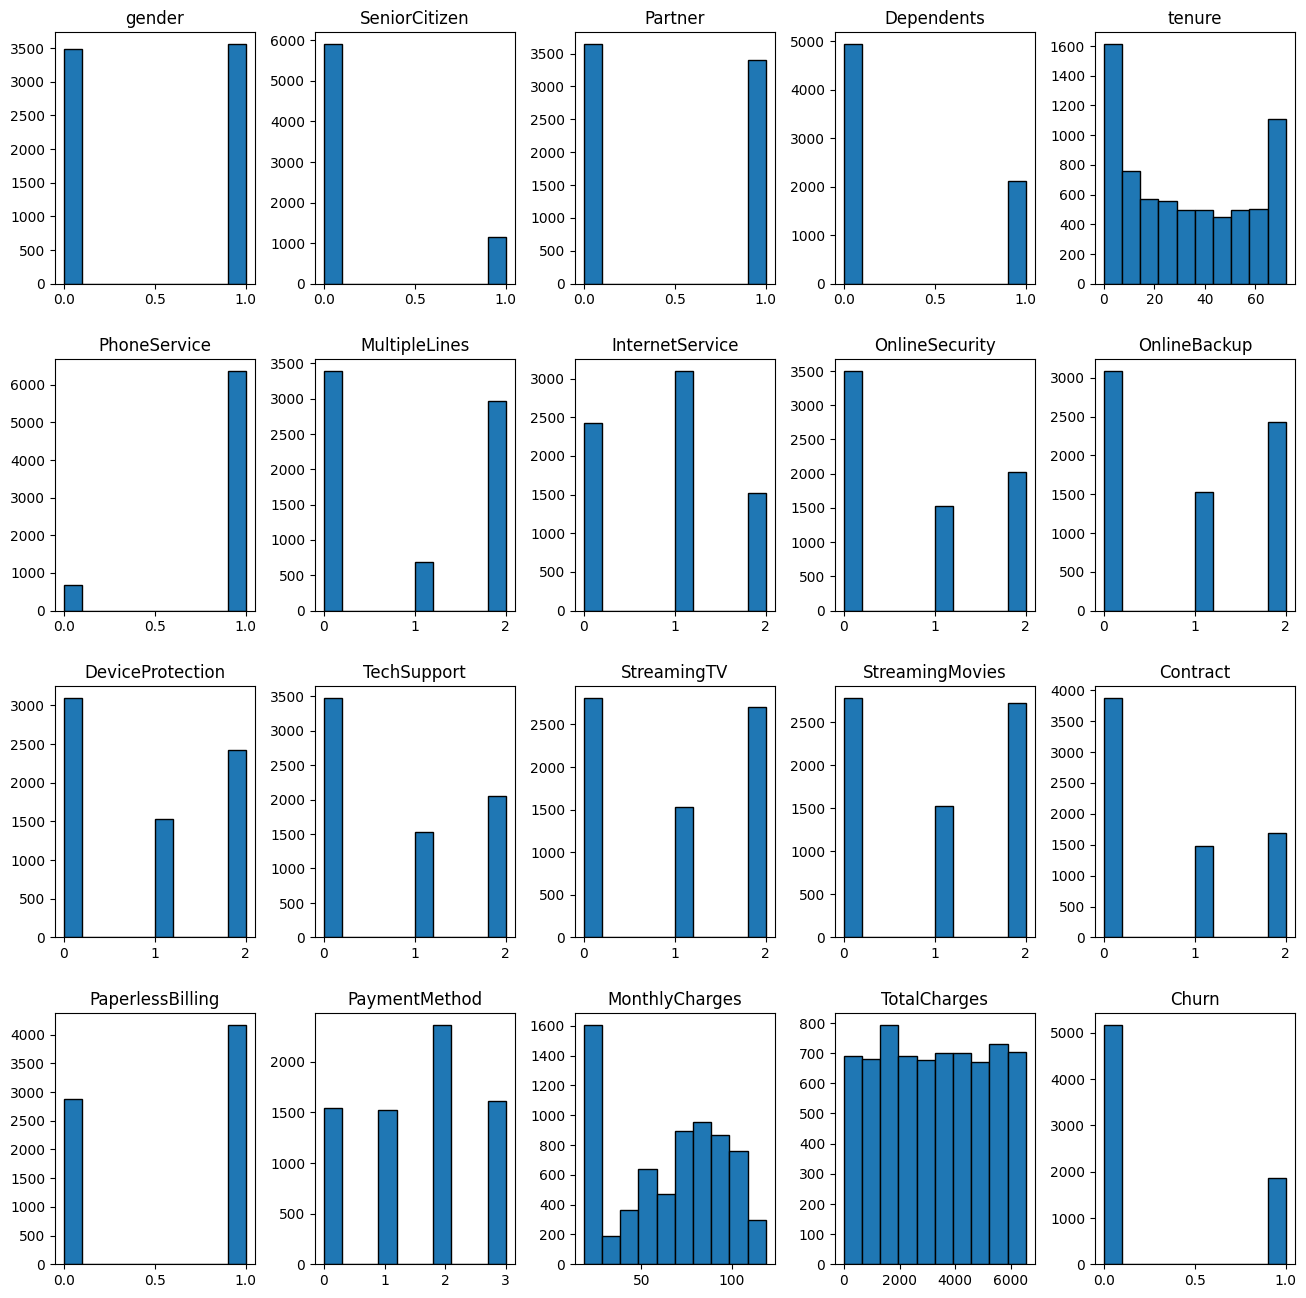

In [10]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(4, 5, figsize=(16,16))

data.hist(ax=axis,  edgecolor='black', grid=False)

<Axes: >

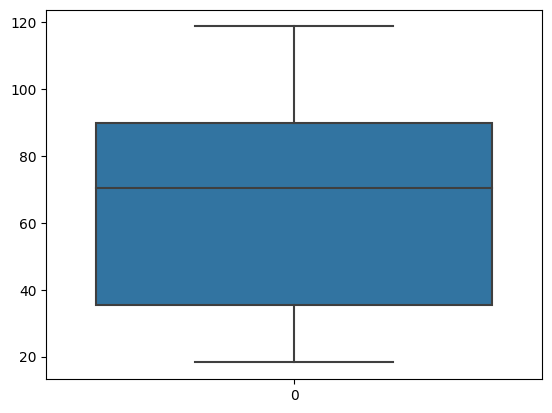

In [11]:
# Box Plot
import seaborn as sns
sns.boxplot(data["MonthlyCharges"])

Removing outliers if exist:

In [12]:
data_no_outlier = data.copy()
i = 0
for column in columns_names:
  data_no_outlier = data_no_outlier[(data_no_outlier[column] >= st_3[i][0]) | (data_no_outlier[column] <= st_3[i][1])]
  i+=1
data_no_outlier

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


### 1.3. Data Formating
The desired formate for our models requer all featuers to represented in numerical values with no missing values or outliers, and binary categorical vales represented in dummy variavbles.

In [13]:
df = original_data.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
for column in df.columns:
    if df[column].dtypes=="object":
        print(f'{column} : {df[column].unique()}')
        print("ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
gender : ['Female' 'Male']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Partner : ['Yes' 'No']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
Dependents : ['No' 'Yes']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
PhoneService : ['No' 'Yes']
ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
MultipleLines : ['No phone service' 'No' 'Yes']
ـــــــــــــــــــــــــ

Replace alias

In [16]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [17]:
for column in data.columns:
    if data[column].dtypes=="object":
        print(f'{column} : {data[column].unique()}')
        print("ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ")

In [18]:
from patsy import dmatrices, dmatrix, demo_data

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df = dmatrix('gender+SeniorCitizen+Partner+Dependents+tenure+PhoneService+MultipleLines+C(InternetService)+OnlineSecurity+OnlineBackup+DeviceProtection+TechSupport+StreamingTV+StreamingMovies+C(Contract)+PaperlessBilling+C(PaymentMethod)+MonthlyCharges+Churn', df, return_type="dataframe")
df

,Intercept,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],...,C(Contract)[T.One year],C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],Churn[T.Yes],SeniorCitizen,tenure,MonthlyCharges
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,29.85
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,56.95
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,53.85
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,42.30
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,24.0,84.80
7039,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,72.0,103.20
7040,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,11.0,29.60
7041,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,74.40


In [21]:
df.columns

Index(['Intercept', 'gender[T.Male]', 'Partner[T.Yes]', 'Dependents[T.Yes]',
       'PhoneService[T.Yes]', 'MultipleLines[T.Yes]',
       'C(InternetService)[T.Fiber optic]', 'C(InternetService)[T.No]',
       'OnlineSecurity[T.Yes]', 'OnlineBackup[T.Yes]',
       'DeviceProtection[T.Yes]', 'TechSupport[T.Yes]', 'StreamingTV[T.Yes]',
       'StreamingMovies[T.Yes]', 'C(Contract)[T.One year]',
       'C(Contract)[T.Two year]', 'PaperlessBilling[T.Yes]',
       'C(PaymentMethod)[T.Credit card (automatic)]',
       'C(PaymentMethod)[T.Electronic check]',
       'C(PaymentMethod)[T.Mailed check]', 'Churn[T.Yes]', 'SeniorCitizen',
       'tenure', 'MonthlyCharges'],
      dtype='object')

## 2. Feature Engineering
Feature engineering can be done in 3 steps:  
2.1. Feature Construction  
2.2. Feature Transforming  
2.3. Feature selection and extraction

### 2.1. Feature Construction
construct a new feature named all services compaine features PhoneService[T.Yes]','C(InternetService)[T.Fiber optic]',
       'OnlineSecurity[T.Yes]', 'OnlineBackup[T.Yes]',
       'DeviceProtection[T.Yes]', 'TechSupport[T.Yes]', 'StreamingTV[T.Yes]',
       'StreamingMovies[T.Yes] using AND operation

In [22]:
df = df.astype(int)
df

,Intercept,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],...,C(Contract)[T.One year],C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],Churn[T.Yes],SeniorCitizen,tenure,MonthlyCharges
0,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,29
1,1,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,34,56
2,1,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,1,0,2,53
3,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,45,42
4,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,0,0,1,0,...,1,0,1,0,0,1,0,0,24,84
7039,1,0,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,0,72,103
7040,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,11,29
7041,1,1,1,0,1,1,1,0,0,0,...,0,0,1,0,0,1,1,1,4,74


In [23]:
df2 = df[(df['PhoneService[T.Yes]'] == 1) & (df["C(InternetService)[T.Fiber optic]"]==1) & (df['OnlineSecurity[T.Yes]']==1) & (df['OnlineBackup[T.Yes]']==1) & (df['DeviceProtection[T.Yes]']==1) & (df['TechSupport[T.Yes]']==1) & (df['StreamingTV[T.Yes]']==1) & (df['StreamingMovies[T.Yes]']==1)]
df2

,Intercept,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],...,C(Contract)[T.One year],C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],Churn[T.Yes],SeniorCitizen,tenure,MonthlyCharges
15,1,0,1,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,0,69,113
256,1,0,1,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,0,61,115
257,1,1,0,0,1,1,1,0,1,1,...,1,0,0,1,0,0,0,0,50,114
264,1,0,1,0,1,1,1,0,1,1,...,1,0,0,0,0,1,0,0,45,113
312,1,0,0,0,1,1,1,0,1,1,...,0,1,0,1,0,0,0,0,43,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6566,1,1,1,1,1,1,1,0,1,1,...,0,1,1,1,0,0,0,0,70,116
6728,1,0,1,0,1,1,1,0,1,1,...,0,1,0,0,1,0,0,0,72,115
6768,1,0,1,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,0,72,117
6859,1,0,0,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,0,71,111


In [24]:
df["All Services"]= [1 if x in df2.index else 0 for x in df.index]
df

,Intercept,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],...,C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],Churn[T.Yes],SeniorCitizen,tenure,MonthlyCharges,All Services
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,29,0
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,34,56,0
2,1,1,0,0,1,0,0,0,1,1,...,0,1,0,0,1,1,0,2,53,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,45,42,0
4,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,0,0,1,0,...,0,1,0,0,1,0,0,24,84,0
7039,1,0,1,1,1,1,1,0,0,1,...,0,1,1,0,0,0,0,72,103,0
7040,1,0,1,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,11,29,0
7041,1,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,1,1,4,74,0


In [25]:
df

,Intercept,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],...,C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],Churn[T.Yes],SeniorCitizen,tenure,MonthlyCharges,All Services
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,29,0
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,34,56,0
2,1,1,0,0,1,0,0,0,1,1,...,0,1,0,0,1,1,0,2,53,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,45,42,0
4,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,0,0,1,0,...,0,1,0,0,1,0,0,24,84,0
7039,1,0,1,1,1,1,1,0,0,1,...,0,1,1,0,0,0,0,72,103,0
7040,1,0,1,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,11,29,0
7041,1,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,1,1,4,74,0


### 2.2. Feature Transforming
Involves feature scaling, we will use sklearn MinMaxScaler

In [26]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data.to_numpy())
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

data_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.244564,0.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.872588,0.0
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.458499,0.0
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.407351,1.0


### 2.3. Feature selection and extraction
Selected feature are:
* 'gender[T.Male]',
* 'Partner[T.Yes]',
* 'Dependents[T.Yes]',
* 'PhoneService[T.Yes]',
* 'MultipleLines[T.Yes]',
* 'C(InternetService)[T.Fiber optic]',
* 'C(InternetService)[T.No]',
* 'OnlineSecurity[T.Yes]',
* 'OnlineBackup[T.Yes]',
* 'DeviceProtection[T.Yes]',
* 'TechSupport[T.Yes]',
* 'StreamingTV[T.Yes]',
* 'StreamingMovies[T.Yes]',
* 'C(Contract)[T.One year]',
* 'C(Contract)[T.Two year]',
* 'PaperlessBilling[T.Yes]',
* 'C(PaymentMethod)[T.Credit card (automatic)]',
* 'C(PaymentMethod)[T.Electronic check]',
* 'C(PaymentMethod)[T.Mailed check]',
* 'SeniorCitizen'
* 'tenure',
* 'MonthlyCharges',
* 'All Services'  
  
Target feature is:
* 'Churn[T.Yes]',


In [28]:
df.columns

Index(['Intercept', 'gender[T.Male]', 'Partner[T.Yes]', 'Dependents[T.Yes]',
       'PhoneService[T.Yes]', 'MultipleLines[T.Yes]',
       'C(InternetService)[T.Fiber optic]', 'C(InternetService)[T.No]',
       'OnlineSecurity[T.Yes]', 'OnlineBackup[T.Yes]',
       'DeviceProtection[T.Yes]', 'TechSupport[T.Yes]', 'StreamingTV[T.Yes]',
       'StreamingMovies[T.Yes]', 'C(Contract)[T.One year]',
       'C(Contract)[T.Two year]', 'PaperlessBilling[T.Yes]',
       'C(PaymentMethod)[T.Credit card (automatic)]',
       'C(PaymentMethod)[T.Electronic check]',
       'C(PaymentMethod)[T.Mailed check]', 'Churn[T.Yes]', 'SeniorCitizen',
       'tenure', 'MonthlyCharges', 'All Services'],
      dtype='object')

In [29]:
df_selected = df.copy()
df_selected = df_selected.drop(['Intercept','tenure','MonthlyCharges','Churn[T.Yes]'], axis=1)
df_selected

,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],DeviceProtection[T.Yes],...,StreamingTV[T.Yes],StreamingMovies[T.Yes],C(Contract)[T.One year],C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],SeniorCitizen,All Services
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,0,0,1,0,1,...,1,1,1,0,1,0,0,1,0,0
7039,0,1,1,1,1,1,0,0,1,1,...,1,1,1,0,1,1,0,0,0,0
7040,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
7041,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [30]:
df_selected.columns

Index(['gender[T.Male]', 'Partner[T.Yes]', 'Dependents[T.Yes]',
       'PhoneService[T.Yes]', 'MultipleLines[T.Yes]',
       'C(InternetService)[T.Fiber optic]', 'C(InternetService)[T.No]',
       'OnlineSecurity[T.Yes]', 'OnlineBackup[T.Yes]',
       'DeviceProtection[T.Yes]', 'TechSupport[T.Yes]', 'StreamingTV[T.Yes]',
       'StreamingMovies[T.Yes]', 'C(Contract)[T.One year]',
       'C(Contract)[T.Two year]', 'PaperlessBilling[T.Yes]',
       'C(PaymentMethod)[T.Credit card (automatic)]',
       'C(PaymentMethod)[T.Electronic check]',
       'C(PaymentMethod)[T.Mailed check]', 'SeniorCitizen', 'All Services'],
      dtype='object')

In [31]:
data_scaled.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
data_scale_selected = data_scaled.iloc[:, [-3,-2]]
data_scale_selected

,MonthlyCharges,TotalCharges
0,0.115423,0.383614
1,0.385075,0.224502
2,0.354229,0.024043
3,0.239303,0.214395
4,0.521891,0.141654
...,...,...
7038,0.662189,0.244564
7039,0.845274,0.872588
7040,0.112935,0.458499
7041,0.558706,0.407351


In [33]:
y_data_selected = data.iloc[:,-1]
y_data_selected

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [34]:
frames = [df_selected, data_scale_selected]
x_selected_data = pd.concat(frames, axis=1)
x_selected_data

,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],DeviceProtection[T.Yes],...,C(Contract)[T.One year],C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],SeniorCitizen,All Services,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0.115423,0.383614
1,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0.385075,0.224502
2,1,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0.354229,0.024043
3,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0.239303,0.214395
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0.521891,0.141654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0.662189,0.244564
7039,0,1,1,1,1,1,0,0,1,1,...,1,0,1,1,0,0,0,0,0.845274,0.872588
7040,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0.112935,0.458499
7041,1,1,0,1,1,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0.558706,0.407351


In [35]:
dframes = [x_selected_data, y_data_selected]
data_frame = pd.concat(dframes, axis=1)

In [36]:
x = x_selected_data
y = y_data_selected

## 3. Data Modeling
We will compare prediction of the following models:  
3.1. Logistics Regression  
3.2. Decision Tree Classifer  
3.3. Random Forest  
3.4. XGBoost Classifier  

### 3.1. Logistics Regression

In [37]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

In [38]:
# Importing Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [39]:
from sklearn.linear_model import LogisticRegression
def LReg(x,y):
  X = StandardScaler().fit_transform(x)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
  model = LogisticRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  lReg = round(accuracy_score(y_test, predictions)*100,2)
  print(lReg)
  print(classification_report(y_test, predictions))
  return lReg
lr_acc = LReg(x,y)

79.56
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1061
           1       0.59      0.54      0.57       348

    accuracy                           0.80      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### 3.2. Decision Tree Classifer  

In [40]:
from sklearn.tree import DecisionTreeClassifier
def dt(x,y):
  X = StandardScaler().fit_transform(x)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
  model_decisionTree = DecisionTreeClassifier(max_depth=7, random_state=20)
  model_decisionTree.fit(X_train, y_train)
  pred_decisionTree = model_decisionTree.predict(X_test)
  decisionTree = round(accuracy_score(y_test, pred_decisionTree)*100, 2)
  print(decisionTree)
  print(classification_report(y_test, pred_decisionTree))
  return decisionTree
dt_acc = dt(x,y)

79.91
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.61      0.52      0.56       348

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### 3.3. Random Forest  

In [41]:
from sklearn.ensemble import RandomForestClassifier
def rf(x,y):
  X = StandardScaler().fit_transform(x)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
  model_rForest=RandomForestClassifier(criterion = "gini",random_state = 10,max_depth=200, min_samples_leaf=5)
  model_rForest.fit(X_train, y_train)
  pred_rForest = model_rForest.predict(X_test)
  rForest = round(accuracy_score(y_test, pred_rForest)*100, 2)
  print(rForest)
  print(classification_report(y_test,pred_rForest))
  return rForest
rf_acc = rf(x,y)

81.05
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1061
           1       0.64      0.52      0.58       348

    accuracy                           0.81      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### 3.4. XGBoost Classifier  

In [42]:
from xgboost import XGBClassifier
def xgbt(x,y):
  X = StandardScaler().fit_transform(x)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
  model_xgb = XGBClassifier(max_depth= 8, n_estimators= 150, random_state= 0,  learning_rate= 0.03, n_jobs=10)
  model_xgb.fit(X_train, y_train)
  pred_xgb = model_xgb.predict(X_test)
  xgb = round(accuracy_score(y_test, pred_xgb)*100, 2)
  print(xgb)
  print(classification_report(y_test,pred_xgb))
  return xgb
xgb_acc = xgbt(x,y)

80.13
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.61      0.54      0.57       348

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



### Models Comparison

,Model,Accuracy_score
2,Random Forest,81.05
3,XGBoost,80.13
1,Decision Tree,79.91
0,Logistic Regression,79.56


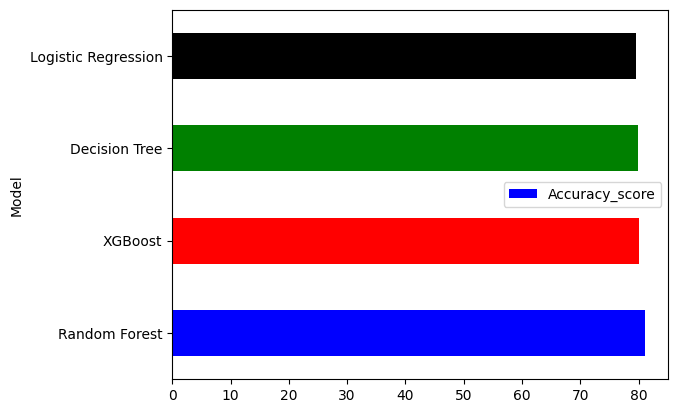

In [43]:
from itertools import cycle, islice
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy_score' :[lr_acc, dt_acc, rf_acc, xgb_acc]
})
my_colors = list(islice(cycle(['b', 'r', 'g', 'k']), None, len(models)))
models = models.sort_values(by='Accuracy_score', ascending=False)
models.plot.barh(x='Model', y='Accuracy_score', color= my_colors)
models

## 4. Performance Measure

### 4.1. Correlation

In [44]:
data_frame.corr()

,gender[T.Male],Partner[T.Yes],Dependents[T.Yes],PhoneService[T.Yes],MultipleLines[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],OnlineBackup[T.Yes],DeviceProtection[T.Yes],...,C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],C(PaymentMethod)[T.Mailed check],SeniorCitizen,All Services,MonthlyCharges,TotalCharges,Churn
gender[T.Male],1.000000,-0.001808,0.010517,-0.006488,-0.008414,-0.011286,0.006026,-0.017021,-0.013773,-0.002105,...,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.001874,-0.004401,-0.014569,-0.005291,-0.008612
Partner[T.Yes],-0.001808,1.000000,0.452676,0.017706,0.142057,0.000304,0.000615,0.143106,0.141498,0.153786,...,0.248091,-0.014877,0.082029,-0.083852,-0.095125,0.016479,0.062666,0.096848,0.059568,-0.150448
Dependents[T.Yes],0.010517,0.452676,1.000000,-0.001762,-0.024526,-0.165818,0.139812,0.080972,0.023671,0.013963,...,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.211185,0.017168,-0.113890,-0.009572,-0.164221
PhoneService[T.Yes],-0.006488,0.017706,-0.001762,1.000000,0.279690,0.289999,0.172209,-0.092893,-0.052312,-0.071227,...,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.008576,0.046801,0.247398,0.083195,0.011942
MultipleLines[T.Yes],-0.008414,0.142057,-0.024526,0.279690,1.000000,0.366083,-0.210564,0.098108,0.202237,0.201137,...,0.106253,0.163530,0.060048,0.083618,-0.227206,0.142948,0.126278,0.490434,0.135300,0.040102
C(InternetService)[T.Fiber optic],-0.011286,0.000304,-0.165818,0.289999,0.366083,1.000000,-0.465793,-0.030696,0.165651,0.176049,...,-0.211526,0.326853,-0.050077,0.336410,-0.306834,0.255338,0.161382,0.787066,0.202272,0.308020
C(InternetService)[T.No],0.006026,0.000615,0.139812,0.172209,-0.210564,-0.465793,1.000000,-0.333403,-0.381593,-0.380754,...,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.182742,-0.075171,-0.763557,-0.171740,-0.227890
OnlineSecurity[T.Yes],-0.017021,0.143106,0.080972,-0.092893,0.098108,-0.030696,-0.333403,1.000000,0.283832,0.275438,...,0.191773,-0.003636,0.115721,-0.112338,-0.080798,-0.038653,0.225465,0.296594,0.118498,-0.171226
OnlineBackup[T.Yes],-0.013773,0.141498,0.023671,-0.052312,0.202237,0.165651,-0.381593,0.283832,1.000000,0.303546,...,0.111400,0.126735,0.090785,-0.000408,-0.174164,0.066572,0.196991,0.441780,0.158445,-0.082255
DeviceProtection[T.Yes],-0.002105,0.153786,0.013963,-0.071227,0.201137,0.176049,-0.380754,0.275438,0.303546,1.000000,...,0.165096,0.103797,0.111554,-0.003351,-0.187373,0.059428,0.197425,0.482692,0.172564,-0.066160


<Axes: >

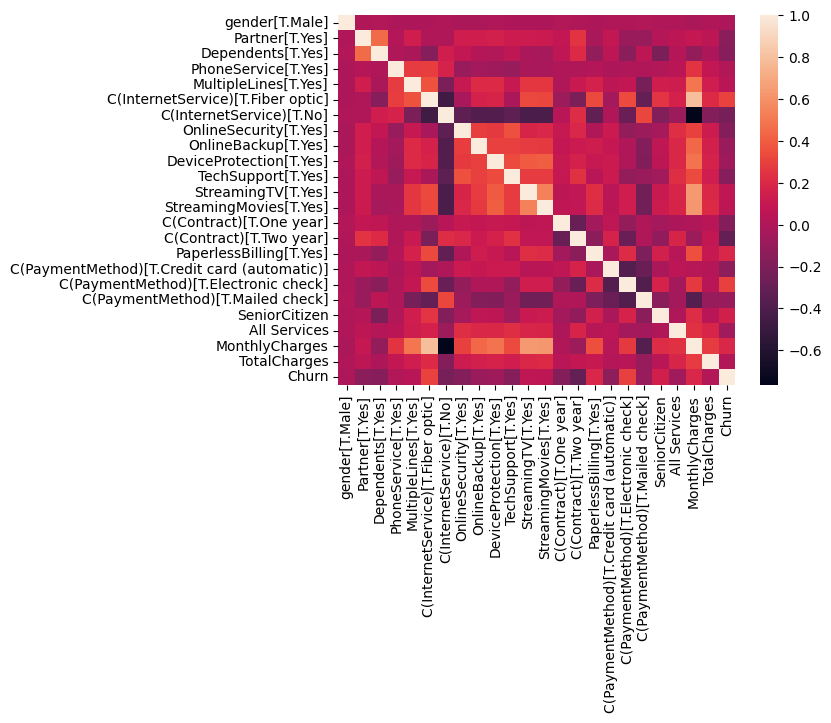

In [45]:
sns.heatmap(data_frame.corr())

### 4.2. Scatter

In [46]:
import plotly.express as px
px.scatter(data_frame, y="Churn", x="C(Contract)[T.Two year]")

In [47]:
px.scatter(data_frame, y="Churn", x="TotalCharges")

## 5. Performance Improvement

### 5.1. Remove features with correlation < 0.1 and > -0.1 with the target

In [48]:
corr_df = data_frame.corr()
corr_df["Churn"]

gender[T.Male]                                -0.008612
Partner[T.Yes]                                -0.150448
Dependents[T.Yes]                             -0.164221
PhoneService[T.Yes]                            0.011942
MultipleLines[T.Yes]                           0.040102
C(InternetService)[T.Fiber optic]              0.308020
C(InternetService)[T.No]                      -0.227890
OnlineSecurity[T.Yes]                         -0.171226
OnlineBackup[T.Yes]                           -0.082255
DeviceProtection[T.Yes]                       -0.066160
TechSupport[T.Yes]                            -0.164674
StreamingTV[T.Yes]                             0.063228
StreamingMovies[T.Yes]                         0.061382
C(Contract)[T.One year]                       -0.177820
C(Contract)[T.Two year]                       -0.302253
PaperlessBilling[T.Yes]                        0.191825
C(PaymentMethod)[T.Credit card (automatic)]   -0.134302
C(PaymentMethod)[T.Electronic check]           0

In [49]:
weak_corr_df = corr_df[(corr_df["Churn"] < 0.1) & (corr_df["Churn"] > -0.1)]
weak_corr_df["Churn"]

gender[T.Male]                     -0.008612
PhoneService[T.Yes]                 0.011942
MultipleLines[T.Yes]                0.040102
OnlineBackup[T.Yes]                -0.082255
DeviceProtection[T.Yes]            -0.066160
StreamingTV[T.Yes]                  0.063228
StreamingMovies[T.Yes]              0.061382
C(PaymentMethod)[T.Mailed check]   -0.091683
All Services                       -0.056058
TotalCharges                        0.014479
Name: Churn, dtype: float64

In [50]:
weak_corr_df.index

Index(['gender[T.Male]', 'PhoneService[T.Yes]', 'MultipleLines[T.Yes]',
       'OnlineBackup[T.Yes]', 'DeviceProtection[T.Yes]', 'StreamingTV[T.Yes]',
       'StreamingMovies[T.Yes]', 'C(PaymentMethod)[T.Mailed check]',
       'All Services', 'TotalCharges'],
      dtype='object')

In [51]:
improved_data_frame = data_frame.copy()
for column in data_frame.columns:
  if column in weak_corr_df.index:
    improved_data_frame = improved_data_frame.drop(column, axis=1)
  else:
    continue
improved_data_frame.columns

Index(['Partner[T.Yes]', 'Dependents[T.Yes]',
       'C(InternetService)[T.Fiber optic]', 'C(InternetService)[T.No]',
       'OnlineSecurity[T.Yes]', 'TechSupport[T.Yes]',
       'C(Contract)[T.One year]', 'C(Contract)[T.Two year]',
       'PaperlessBilling[T.Yes]',
       'C(PaymentMethod)[T.Credit card (automatic)]',
       'C(PaymentMethod)[T.Electronic check]', 'SeniorCitizen',
       'MonthlyCharges', 'Churn'],
      dtype='object')

### 5.2. Check Models Performance

#### Improved Dataframe

In [52]:
x_improved = improved_data_frame.iloc[:,:-1]
x_improved

,Partner[T.Yes],Dependents[T.Yes],C(InternetService)[T.Fiber optic],C(InternetService)[T.No],OnlineSecurity[T.Yes],TechSupport[T.Yes],C(Contract)[T.One year],C(Contract)[T.Two year],PaperlessBilling[T.Yes],C(PaymentMethod)[T.Credit card (automatic)],C(PaymentMethod)[T.Electronic check],SeniorCitizen,MonthlyCharges
0,1,0,0,0,0,0,0,0,1,0,1,0,0.115423
1,0,0,0,0,1,0,1,0,0,0,0,0,0.385075
2,0,0,0,0,1,0,0,0,1,0,0,0,0.354229
3,0,0,0,0,1,1,1,0,0,0,0,0,0.239303
4,0,0,1,0,0,0,0,0,1,0,1,0,0.521891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,1,1,1,0,1,0,0,0,0.662189
7039,1,1,1,0,0,0,1,0,1,1,0,0,0.845274
7040,1,1,0,0,1,0,0,0,1,0,1,0,0.112935
7041,1,0,1,0,0,0,0,0,1,0,0,1,0.558706


In [53]:
y_improved = improved_data_frame["Churn"]
y_improved

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

#### 5.2.1. Logistic Regression

In [54]:
imp_lr = LReg(x_improved,y_improved)

79.99
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1061
           1       0.60      0.59      0.59       348

    accuracy                           0.80      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



##### Performance Improved

#### 5.2.2 Decision Tree Classifer  

In [55]:
imp_df = dt(x_improved,y_improved)

78.64
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1061
           1       0.56      0.59      0.58       348

    accuracy                           0.79      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



##### Performance Decreased

#### 5.2.3. Random Forest  

In [56]:
imp_rf = rf(x_improved,y_improved)

79.84
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.61      0.53      0.56       348

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



##### Performance Decreased

#### 5.2.4. XGBoost Classifier

In [57]:
imp_xgb = xgbt(x_improved,y_improved)

79.63
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1061
           1       0.59      0.58      0.59       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



##### Performance Decreased

## Results  
Our model can predict cutomer churn in telecom industry with 81% accuracy.

,Model,Accuracy_score
2,Random Forest,81.05
3,XGBoost,80.13
0,Logistic Regression,79.99
1,Decision Tree,79.91


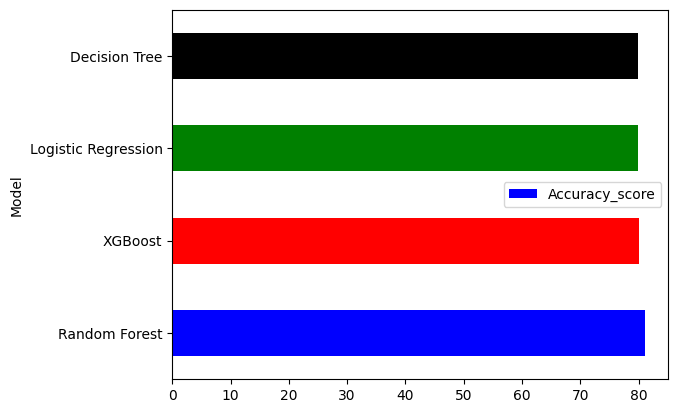

In [58]:
from itertools import cycle, islice
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy_score' :[imp_lr, dt_acc, rf_acc, xgb_acc]
})
my_colors = list(islice(cycle(['b', 'r', 'g', 'k']), None, len(models)))
models = models.sort_values(by='Accuracy_score', ascending=False)
models.plot.barh(x='Model', y='Accuracy_score', color= my_colors)
models